In [1]:
import keras
import tensorflow_datasets as tfds
import numpy as np

ds_train, ds_test = tfds.load('svhn_cropped', split=['train[:15%]', 'test[:15%]'], as_supervised=True)

# Convert tf.data.Dataset to NumPy arrays
def tfds_to_numpy(dataset):
    images = []
    labels = []
    for image, label in tfds.as_numpy(dataset):
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

x_train, y_train = tfds_to_numpy(ds_train)
x_test, y_test = tfds_to_numpy(ds_test)

print("The SVHN Street View House Numbers database has a training set of %d examples." % len(x_train))
print("The SVHN Street View House Numbers database has a test set of %d examples." % len(x_test))

The SVHN Street View House Numbers database has a training set of 10989 examples.
The SVHN Street View House Numbers database has a test set of 3905 examples.


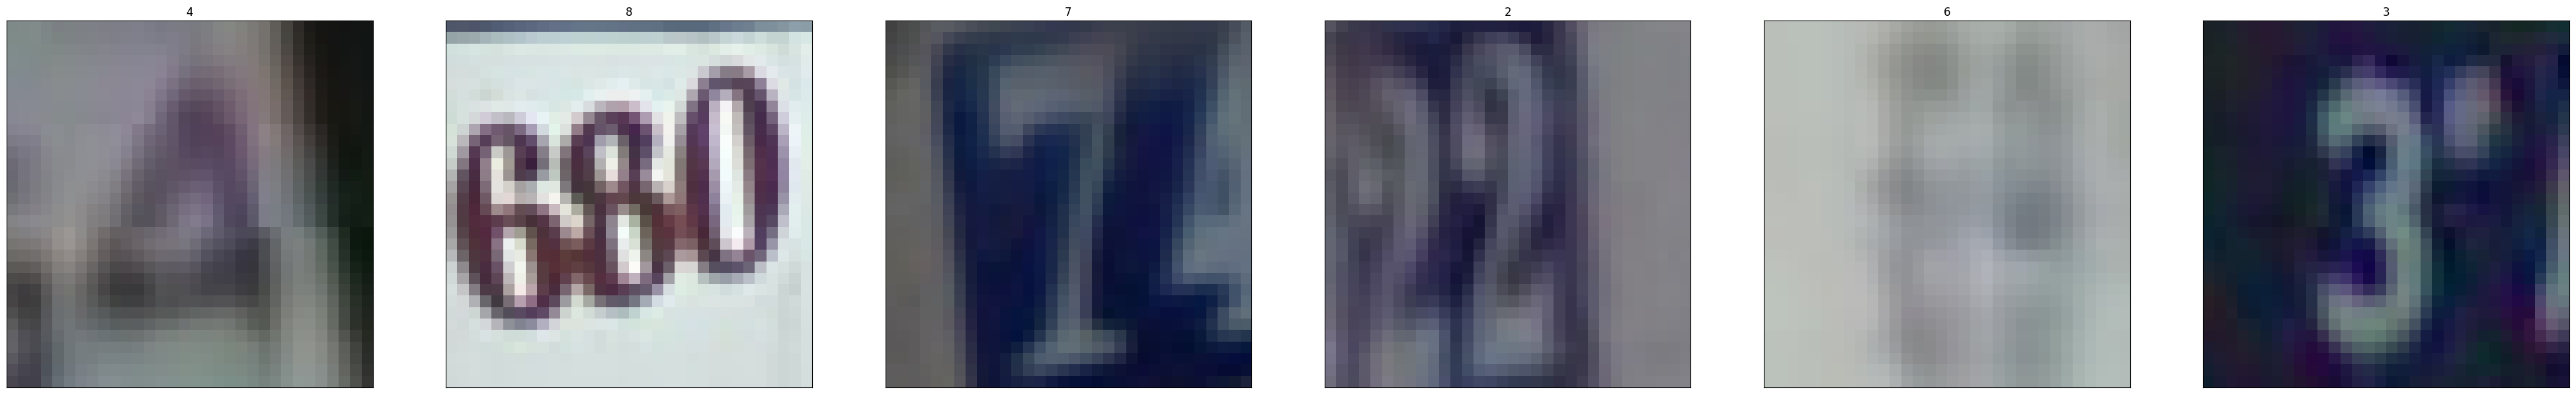

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(50,50))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    ax.set_title(str(y_train[i]))

In [3]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

print('X_train shape:', x_train.shape)

X_train shape: (10989, 32, 32, 3)


In [4]:
from tensorflow.keras.utils import to_categorical

num_classes = 10 
print('Integer-valued labels:')
print(y_train[:10])

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[4 8 7 2 6 3 0 8 5 4]
One-hot labels:
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
img_rows, img_cols, channel = 32, 32, 3

input_shape = (img_rows, img_cols, channel)

print('input_shape: ', input_shape)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

input_shape:  (32, 32, 3)
x_train shape: (10989, 32, 32, 3)
x_test shape: (3905, 32, 32, 3)


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same',
activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\PaulE\DeepLearning\local\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [8]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.color.conv.dropout.keras', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.92509, saving model to model.weights.color.conv.dropout.keras
344/344 - 4s - 11ms/step - accuracy: 0.2243 - loss: 2.1723 - val_accuracy: 0.2914 - val_loss: 1.9251
Epoch 2/15

Epoch 2: val_loss improved from 1.92509 to 1.15158, saving model to model.weights.color.conv.dropout.keras
344/344 - 2s - 7ms/step - accuracy: 0.5044 - loss: 1.5204 - val_accuracy: 0.6592 - val_loss: 1.1516
Epoch 3/15

Epoch 3: val_loss improved from 1.15158 to 0.93586, saving model to model.weights.color.conv.dropout.keras
344/344 - 2s - 7ms/step - accuracy: 0.6278 - loss: 1.1430 - val_accuracy: 0.7178 - val_loss: 0.9359
Epoch 4/15

Epoch 4: val_loss improved from 0.93586 to 0.81769, saving model to model.weights.color.conv.dropout.keras
344/344 - 2s - 7ms/step - accuracy: 0.7000 - loss: 0.9534 - val_accuracy: 0.7577 - val_loss: 0.8177
Epoch 5/15

Epoch 5: val_loss improved from 0.81769 to 0.72422, saving model to model.weights.color.conv.dropout.keras
344/344 

In [9]:
model.load_weights('model.weights.color.conv.dropout.keras')

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 84.3022%


In [11]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


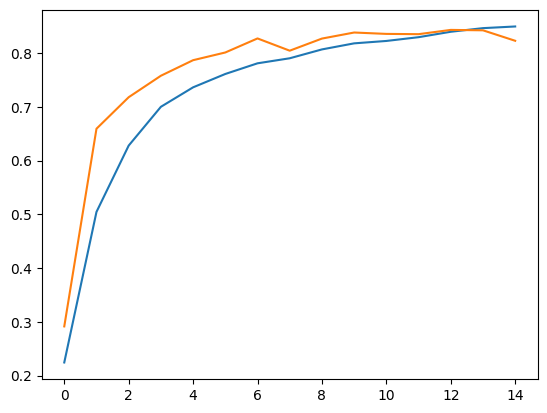

In [12]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.show()

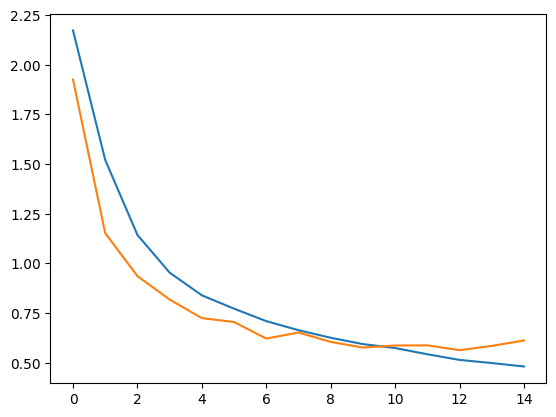

In [13]:
plt.plot(hist.history['loss'], label='Train losss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.show()

**Normalisation**

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same',
activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same',
activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

In [15]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer2 = ModelCheckpoint(filepath='model.weights.color.normalised.conv.dropout.keras', verbose=1, 
                               save_best_only=True)
hist2 = model.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer2], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.22538, saving model to model.weights.color.normalised.conv.dropout.keras
344/344 - 3s - 10ms/step - accuracy: 0.3463 - loss: 1.8940 - val_accuracy: 0.6074 - val_loss: 1.2254
Epoch 2/15

Epoch 2: val_loss improved from 1.22538 to 0.85671, saving model to model.weights.color.normalised.conv.dropout.keras
344/344 - 3s - 8ms/step - accuracy: 0.6414 - loss: 1.1180 - val_accuracy: 0.7462 - val_loss: 0.8567
Epoch 3/15

Epoch 3: val_loss improved from 0.85671 to 0.77640, saving model to model.weights.color.normalised.conv.dropout.keras
344/344 - 2s - 7ms/step - accuracy: 0.7191 - loss: 0.8782 - val_accuracy: 0.7667 - val_loss: 0.7764
Epoch 4/15

Epoch 4: val_loss improved from 0.77640 to 0.73038, saving model to model.weights.color.normalised.conv.dropout.keras
344/344 - 2s - 7ms/step - accuracy: 0.7669 - loss: 0.7557 - val_accuracy: 0.7887 - val_loss: 0.7304
Epoch 5/15

Epoch 5: val_loss improved from 0.73038 to 0.72170, saving model to mod

In [17]:
model.load_weights('model.weights.color.normalised.conv.dropout.keras')
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 85.1216%


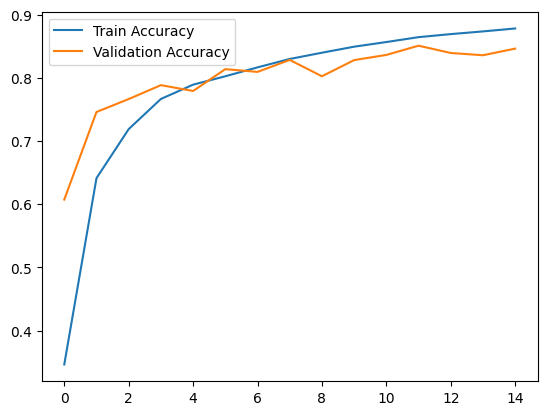

In [18]:
plt.plot(hist2.history['accuracy'], label='Train Accuracy')
plt.plot(hist2.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

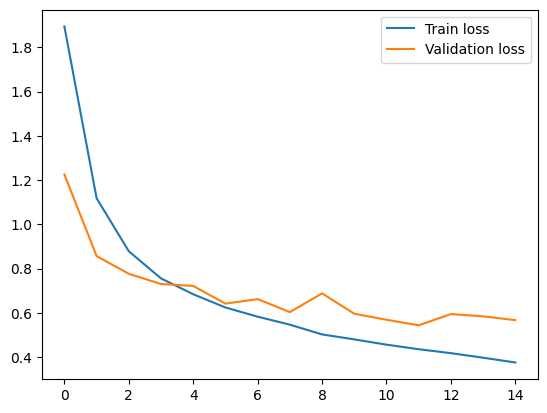

In [19]:
plt.plot(hist2.history['loss'], label='Train loss')
plt.plot(hist2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [20]:
from keras import regularizers
weight_decay = 1e-4 
model3 = Sequential()
model3.add(Conv2D(filters=16, kernel_size=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay), 
                  activation='relu', input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters=32, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay),
activation='relu'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Conv2D(filters=64, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay),
activation='relu'))
model3.add(MaxPooling2D(pool_size=2))

model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(500, activation='relu'))
model3.add(Dropout(0.4))

model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,054 (2.01 MB)

 Trainable params: 528,054 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
checkpointer3 = ModelCheckpoint(filepath='model.weights.color.conv.dropout.l2.keras', verbose=1, 
                               save_best_only=True)
hist3 = model3.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer3], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.37754, saving model to model.weights.color.conv.dropout.l2.keras
344/344 - 4s - 11ms/step - accuracy: 0.3170 - loss: 1.9757 - val_accuracy: 0.5746 - val_loss: 1.3775
Epoch 2/15

Epoch 2: val_loss improved from 1.37754 to 0.91924, saving model to model.weights.color.conv.dropout.l2.keras
344/344 - 2s - 7ms/step - accuracy: 0.6179 - loss: 1.1907 - val_accuracy: 0.7204 - val_loss: 0.9192
Epoch 3/15

Epoch 3: val_loss improved from 0.91924 to 0.79467, saving model to model.weights.color.conv.dropout.l2.keras
344/344 - 2s - 7ms/step - accuracy: 0.7184 - loss: 0.9135 - val_accuracy: 0.7672 - val_loss: 0.7947
Epoch 4/15

Epoch 4: val_loss improved from 0.79467 to 0.74843, saving model to model.weights.color.conv.dropout.l2.keras
344/344 - 2s - 7ms/step - accuracy: 0.7577 - loss: 0.7903 - val_accuracy: 0.7869 - val_loss: 0.7484
Epoch 5/15

Epoch 5: val_loss improved from 0.74843 to 0.66301, saving model to model.weights.color.conv.dropout.l2

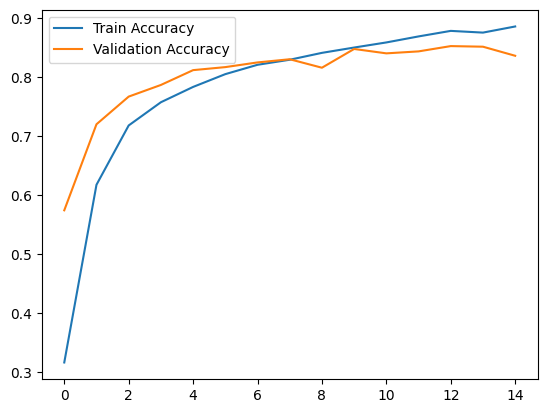

In [22]:
plt.plot(hist3.history['accuracy'], label='Train Accuracy')
plt.plot(hist3.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

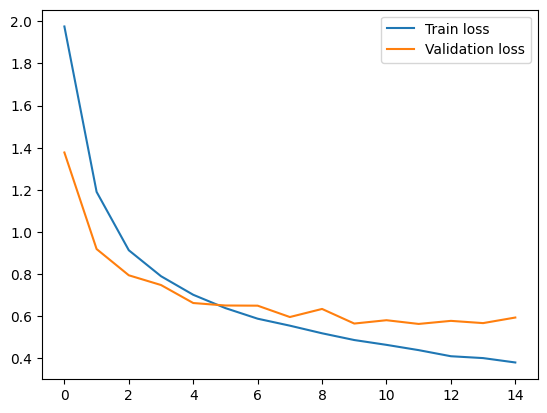

In [23]:
plt.plot(hist3.history['loss'], label='Train loss')
plt.plot(hist3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [24]:
model3.load_weights('model.weights.color.conv.dropout.l2.keras')
score = model3.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 84.3790%


**Batch Normalisation**

In [35]:
from keras import regularizers 
from keras.layers import BatchNormalization, Activation

model4 = Sequential()
model4.add(Conv2D(filters=16, kernel_size=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=input_shape))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Conv2D(filters=32, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Conv2D(filters=64, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=2))

model4.add(Dropout(0.3))

model4.add(Flatten())

model4.add(Dense(500, activation='relu'))
model4.add(Dropout(0.4))

model4.add(Dense(10, activation='softmax'))

model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 16)          │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 16, 16, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 500)                 │         512,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,502 (2.02 MB)

 Trainable params: 528,278 (2.02 MB)

 Non-trainable params: 224 (896.00 B)

In [36]:
model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
checkpointer4 = ModelCheckpoint(filepath='model.weights.color.conv.dropout.l2.batch.keras', verbose=1, 
                               save_best_only=True)
hist4 = model4.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer4], 
          verbose=2, shuffle=True)

Epoch 1/15

Epoch 1: val_loss improved from inf to 1.49620, saving model to model.weights.color.conv.dropout.l2.batch.keras
344/344 - 6s - 17ms/step - accuracy: 0.2831 - loss: 2.1425 - val_accuracy: 0.4822 - val_loss: 1.4962
Epoch 2/15

Epoch 2: val_loss improved from 1.49620 to 1.08501, saving model to model.weights.color.conv.dropout.l2.batch.keras
344/344 - 4s - 12ms/step - accuracy: 0.5602 - loss: 1.3353 - val_accuracy: 0.6251 - val_loss: 1.0850
Epoch 3/15

Epoch 3: val_loss improved from 1.08501 to 0.95717, saving model to model.weights.color.conv.dropout.l2.batch.keras
344/344 - 4s - 12ms/step - accuracy: 0.6671 - loss: 1.0290 - val_accuracy: 0.7019 - val_loss: 0.9572
Epoch 4/15

Epoch 4: val_loss improved from 0.95717 to 0.75289, saving model to model.weights.color.conv.dropout.l2.batch.keras
344/344 - 5s - 13ms/step - accuracy: 0.7171 - loss: 0.8911 - val_accuracy: 0.7795 - val_loss: 0.7529
Epoch 5/15

Epoch 5: val_loss did not improve from 0.75289
344/344 - 4s - 13ms/step - ac

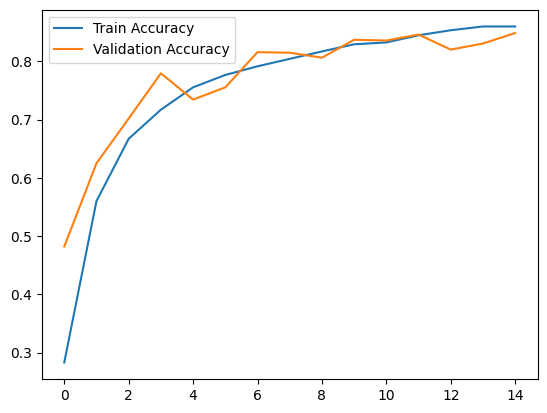

In [37]:
plt.plot(hist4.history['accuracy'], label='Train Accuracy')
plt.plot(hist4.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

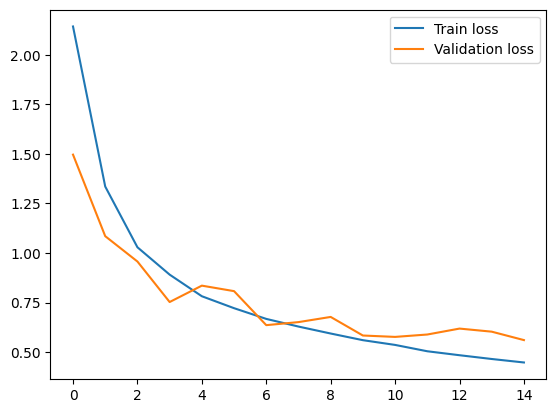

In [38]:
plt.plot(hist4.history['loss'], label='Train loss')
plt.plot(hist4.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [39]:
model4.load_weights('model.weights.color.conv.dropout.l2.batch.keras')
score = model4.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 84.8656%


**DATA Augmentation**

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=5,
width_shift_range=0.1,
height_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False
)
datagen.fit(x_train)
model5 = Sequential()
model5.add(Conv2D(filters=16, kernel_size=2, padding='same', kernel_regularizer=regularizers.l2(weight_decay),
input_shape=input_shape))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=2))

model5.add(Conv2D(filters=32, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=2))

model5.add(Conv2D(filters=64, kernel_size=2, padding='same',  kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=2))

model5.add(Dropout(0.3))

model5.add(Flatten())

model5.add(Dense(500, activation='relu'))
model5.add(Dropout(0.4))

model5.add(Dense(10, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
checkpointer5 = ModelCheckpoint(filepath='model.weights.color.conv.dropout.l2.batch.augm.keras', verbose=1, 
                               save_best_only=True)
hist5 = model5.fit(x_train, y_train, batch_size=32, epochs=15,
          validation_data=(x_test, y_test), callbacks=[checkpointer5], 
          verbose=2, shuffle=True)
model5.load_weights('model.weights.color.conv.dropout.l2.batch.augm.keras')
score = model5.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)


Epoch 1/15

Epoch 1: val_loss improved from inf to 1.59809, saving model to model.weights.color.conv.dropout.l2.batch.augm.keras
344/344 - 6s - 17ms/step - accuracy: 0.2650 - loss: 2.1746 - val_accuracy: 0.4387 - val_loss: 1.5981
Epoch 2/15

Epoch 2: val_loss improved from 1.59809 to 0.97887, saving model to model.weights.color.conv.dropout.l2.batch.augm.keras
344/344 - 4s - 12ms/step - accuracy: 0.5576 - loss: 1.3367 - val_accuracy: 0.6963 - val_loss: 0.9789
Epoch 3/15

Epoch 3: val_loss improved from 0.97887 to 0.89360, saving model to model.weights.color.conv.dropout.l2.batch.augm.keras
344/344 - 4s - 12ms/step - accuracy: 0.6692 - loss: 1.0199 - val_accuracy: 0.7283 - val_loss: 0.8936
Epoch 4/15

Epoch 4: val_loss improved from 0.89360 to 0.70451, saving model to model.weights.color.conv.dropout.l2.batch.augm.keras
344/344 - 4s - 13ms/step - accuracy: 0.7251 - loss: 0.8581 - val_accuracy: 0.7918 - val_loss: 0.7045
Epoch 5/15

Epoch 5: val_loss improved from 0.70451 to 0.65299, savi

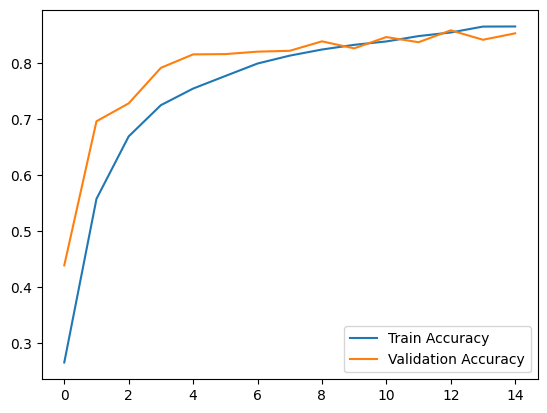

In [41]:
plt.plot(hist5.history['accuracy'], label='Train Accuracy')
plt.plot(hist5.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

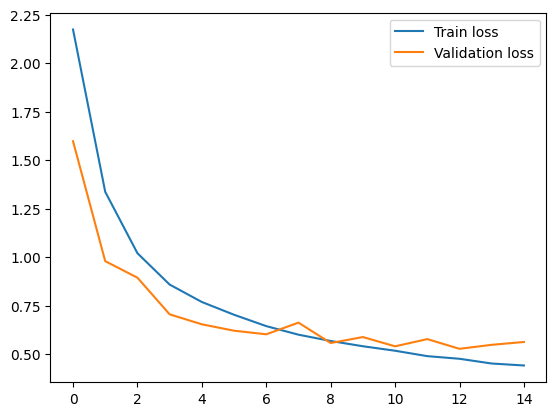

In [42]:
plt.plot(hist5.history['loss'], label='Train loss')
plt.plot(hist5.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [44]:
model5.load_weights('model.weights.color.conv.dropout.l2.batch.augm.keras')
score = model5.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 85.8899%
